<a href="https://colab.research.google.com/github/nerobite/Time_series/blob/main/Times_series_mark_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

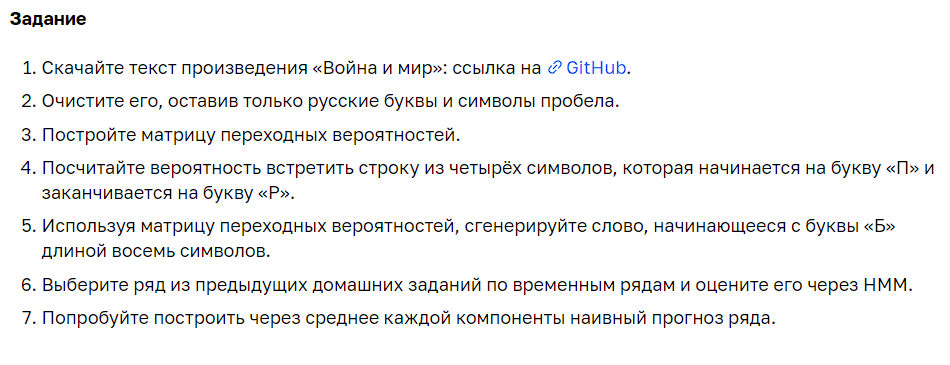

In [ ]:
import pandas as pd
import requests
from io import BytesIO
import zipfile
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
url = 'https://github.com/netology-code/ds3-spring-2018/archive/refs/heads/master.zip'
r = requests.get(url)
z = zipfile.ZipFile(BytesIO(r.content))
z.extractall()

In [ ]:
# Путь к распакованным файлам
path = 'ds3-spring-2018-master/7. Time_series/7.4/war_and_peace/'

# Создайте пустую строку для объединенного текста
combined_text = ""

for filename in os.listdir(path):
    if filename.endswith(".txt"):
        file_path = os.path.join(path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            combined_text += file.read() + "\n"  # Добавляем содержимое файла и перенос строки

# Сохраните объединенный текст в новый файл
with open('combined_war_and_peace.txt', 'w', encoding='utf-8') as output_file:
    output_file.write(combined_text)

# Показать первые 500 символов объединенного текста
print(combined_text[:200])



Annotation


Лев Толстой

Война и Мир

Том 2





* * *



Том IIЧАСТЬ ПЕРВАЯI

II

III

IV

V

VI

VII

VIII

IX

X

ХI

XII

XIII

XIV

XV

XVI





ЧАСТЬ ВТОРАЯI

II

III

IV

V

VI

VII

VIII

IX



In [ ]:
len(combined_text)

2993419

In [ ]:
text = re.sub(r'[^а-яА-ЯёЁ]', '', combined_text)
text = text.lower()


In [ ]:
text[:200]

'левтолстойвойнаимиртомтомчастьперваяхчастьвтораячастьтретьячастьчетвертаячастьпятаяпримечаниеиздателяпечатныевариантытомлевниколаевичтолстойвойнаимиртомчастьперваявначалегоданиколайростоввернулсявотпу'

In [ ]:
RUSSIAN_ALPHABET = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUSSIAN_ALPHABET)}

In [ ]:
probabilities = np.zeros((len(RUSSIAN_ALPHABET), len(RUSSIAN_ALPHABET)))

In [ ]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [ ]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [ ]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN_ALPHABET), columns=(c for c in RUSSIAN_ALPHABET))

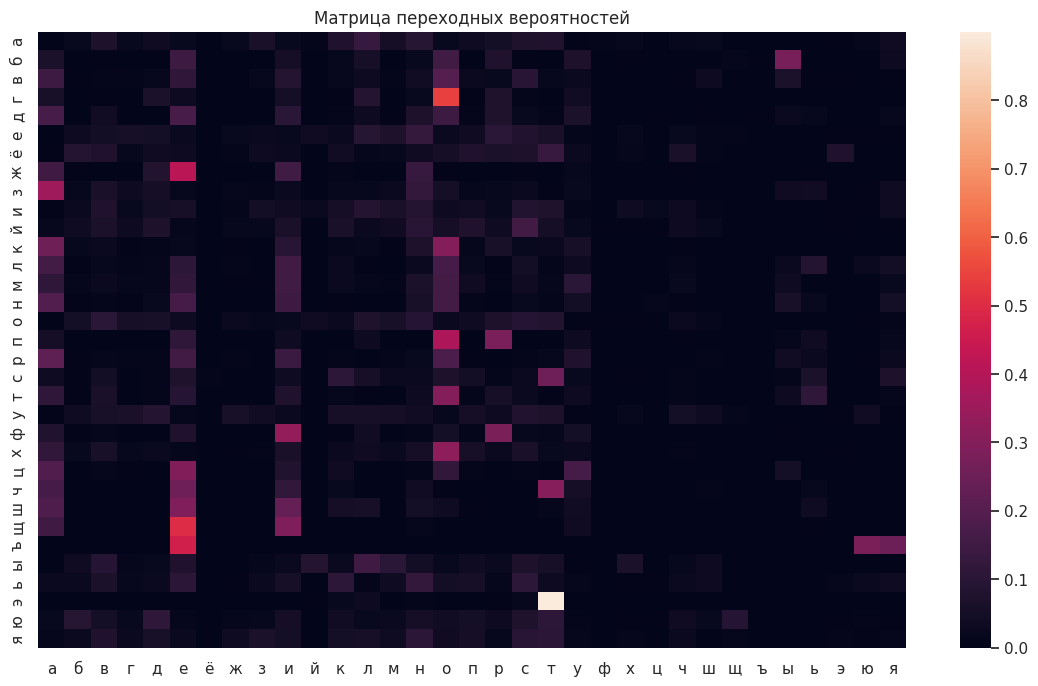

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.title('Матрица переходных вероятностей')
plt.show()

In [ ]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN_ALPHABET)
word_four = {}
for c in RUSSIAN_ALPHABET:
  for cc in RUSSIAN_ALPHABET:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[cc]] * probabilities[POS[cc], end]
    if proba > 0:
      word = ''.join(['п', c, cc, 'р'])
      word_four[word] = proba

In [ ]:
sorted_words = sorted(word_four.items(), key=lambda item: item[1], reverse=True)
top_10_words = sorted_words[:10]

print("Топ-10 слов с наибольшей вероятностью:")
for word, prob in top_10_words:
    print(f"Слово: '{word}', Вероятность: {prob}")

Топ-10 слов с наибольшей вероятностью:
Слово: 'прер', Вероятность: 0.00013158574718183307
Слово: 'попр', Вероятность: 0.00010686523946902817
Слово: 'прор', Вероятность: 0.00010270764738634797
Слово: 'прар', Вероятность: 8.772238118226045e-05
Слово: 'потр', Вероятность: 5.212904137126614e-05
Слово: 'подр', Вероятность: 4.8185996087012806e-05
Слово: 'погр', Вероятность: 4.463878855863205e-05
Слово: 'побр', Вероятность: 4.156883457462513e-05
Слово: 'поер', Вероятность: 3.537166088498617e-05
Слово: 'пепр', Вероятность: 3.5277543075601194e-05


In [ ]:
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN_ALPHABET), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

брамизаж


In [ ]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
from hmmlearn.hmm import GaussianHMM, GMMHMM

In [ ]:
series = pd.read_csv("/content/mean-monthly-air-temperature-deg.csv")["Deg"]

In [ ]:
values = series.values.reshape(-1,1)

In [ ]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -855.6201905961935
2 -767.9283717086513
3 -759.6553313509696
4 -698.7089433304324
5 -678.2882133539568
6 -675.6729860680443
7 -690.6485161714587
8 -646.2304771944431
9 -656.4113861250585
10 -595.6279119720841
11 -591.4161771573368
12 -580.6668273660426
13 -574.7973334223203


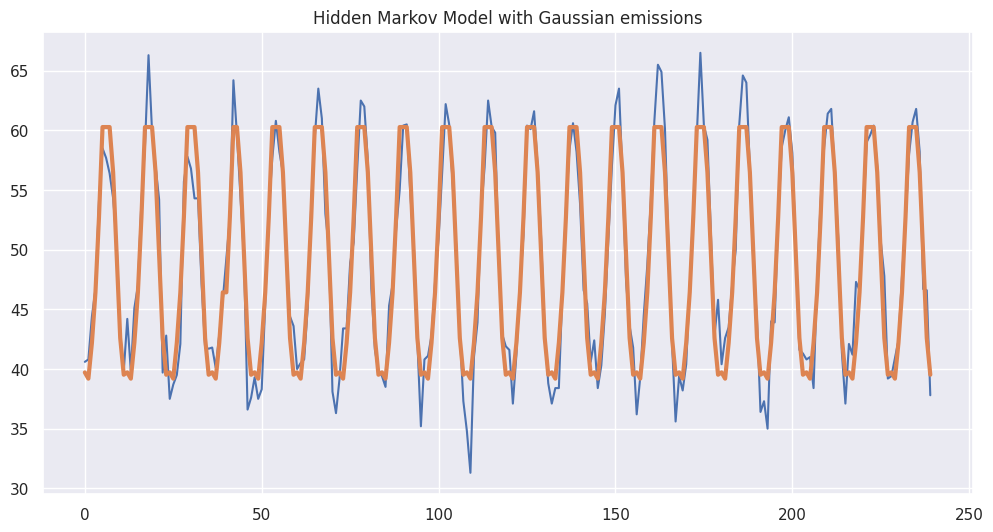

In [ ]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.title("Hidden Markov Model with Gaussian emissions")
plt.plot(means, linewidth=3)

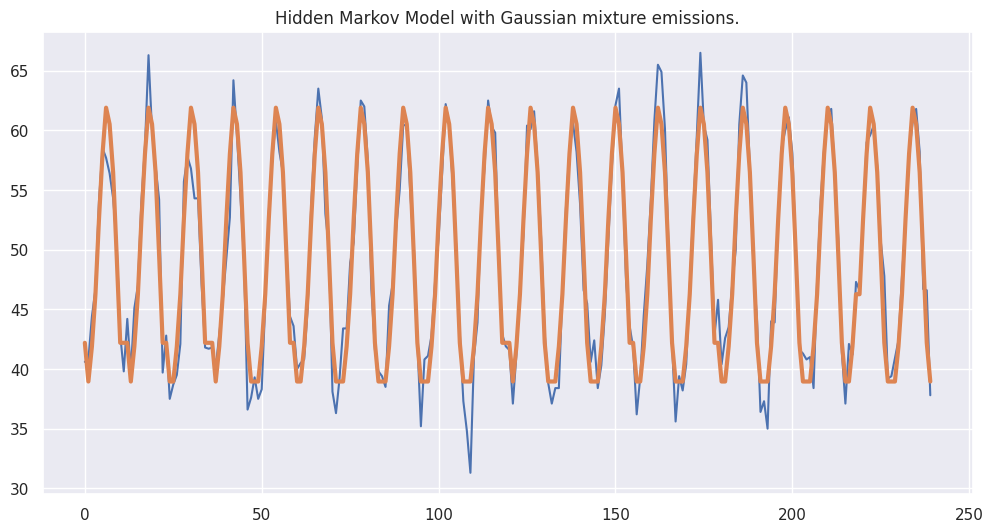

In [ ]:
model = GMMHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.title("Hidden Markov Model with Gaussian mixture emissions.")
plt.plot(means, linewidth=3)

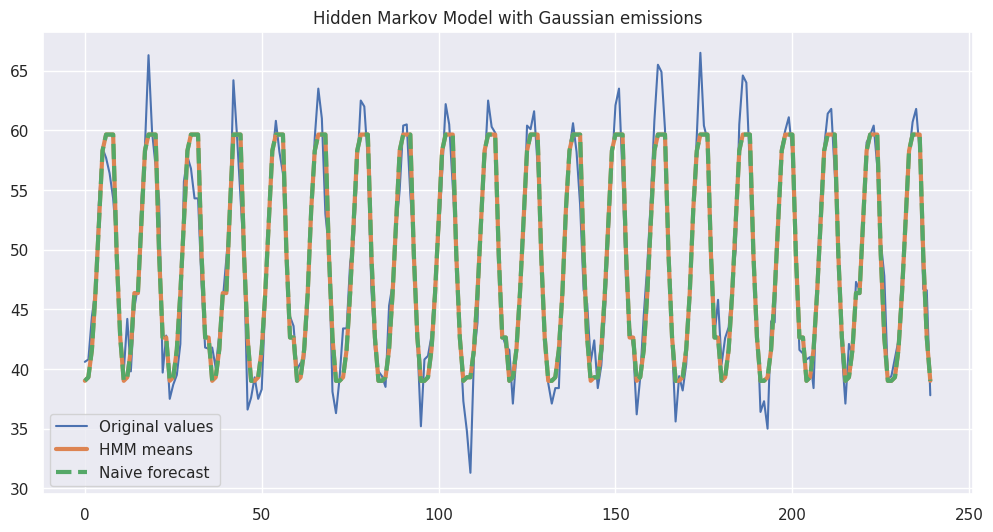

In [ ]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

# Наивный прогноз: предсказание на основе средних значений компонент
# (в данном случае это те же самые значения, которые мы использовали для обучения модели)
predicted_means = np.zeros_like(values)
for i in range(len(values)):
    state = labels[i]
    predicted_means[i] = model.means_[state]

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(values, label='Original values')
plt.plot(means, linewidth=3, label='HMM means')
plt.plot(predicted_means, linewidth=3, linestyle='dashed', label='Naive forecast')
plt.title("Hidden Markov Model with Gaussian emissions")
plt.legend()
plt.show()